In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("./train.csv")

In [17]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Overview of the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

There are some null value in `Postal Code` column. But it is not really important so let fill `0` to it.

In [20]:
print(df['Postal Code'].isna().sum())


11


In [21]:
df.fillna({'Postal Code': 0}, inplace=True)

Change the dtype of the `Postal Code` column to `int` because it is not suitable with `float` values.

In [22]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [23]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Data Cleaning

##### Check duplicate values

In [26]:
def check_duplicate(df: pd.DataFrame):
    if df.duplicated().sum():
        print("Duplicate rows found")
    else:
        print("No duplicate rows found")

In [27]:
check_duplicate(df)

No duplicate rows found


In [30]:
df.duplicated().sum()

np.int64(0)

##### Exploratory Analysis

Customer Segmentation

In [35]:
customer_type = df['Segment'].unique()
print(customer_type)

['Consumer' 'Corporate' 'Home Office']


In [43]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers

,Segment,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


In [45]:
import seaborn as sns

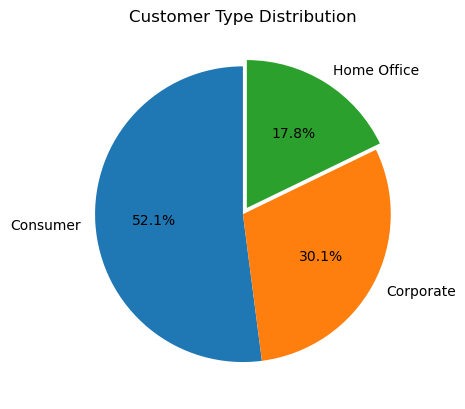

In [54]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Segment'], autopct='%1.1f%%', startangle=90, explode=(0.0, 0.0, 0.05))
plt.title('Customer Type Distribution')
plt.show()

Customers and Sales

In [56]:
sale_per_category = df.groupby('Segment')['Sales'].sum().reset_index()
sale_per_category

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


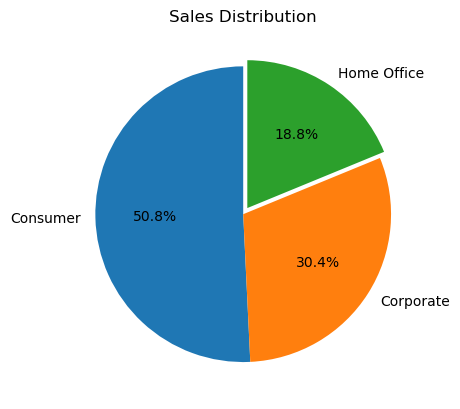

In [75]:
plt.pie(sale_per_category['Sales'], labels=sale_per_category['Segment'], autopct='%1.1f%%', startangle=90, explode=(0.0, 0.0, 0.05))
plt.title('Sales Distribution')
plt.show()

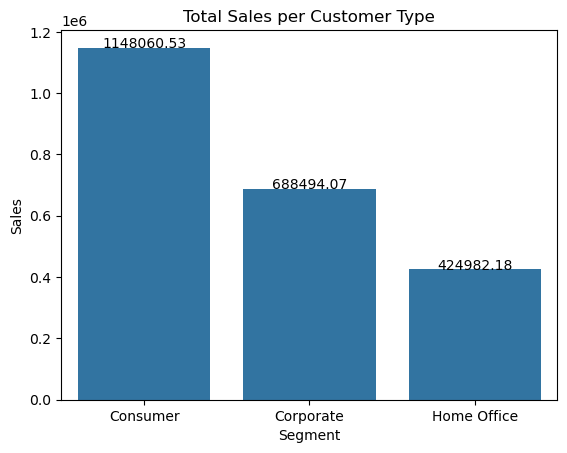

In [85]:
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, errorbar=None)
plt.title("Total Sales per Customer Type")

plt.text(0, sale_per_category['Sales'][0], round(sale_per_category['Sales'][0], 2), ha='center')
plt.text(1, sale_per_category['Sales'][1], round(sale_per_category['Sales'][1], 2), ha='center')
plt.text(2, sale_per_category['Sales'][2], round(sale_per_category['Sales'][2], 2), ha='center')

plt.show()

##### Customer Loyalty

In [87]:
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_order_frequency.rename(columns={'Order ID': 'Order Frequency'}, inplace=True)

In [89]:
sorted_customer_frequency = customer_order_frequency.sort_values(by='Order Frequency', ascending=False)
sorted_customer_frequency.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Order Frequency
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,JD-15895,Jonathan Doherty,Corporate,32
6,SV-20365,Seth Vernon,Consumer,32
7,EP-13915,Emily Phan,Consumer,31
8,ZC-21910,Zuschuss Carroll,Consumer,31
9,AP-10915,Arthur Prichep,Consumer,31


In [90]:
# Top 10 customers with highest sales
customer_sales = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().reset_index()
top_spender = customer_sales.sort_values(by='Sales', ascending=False)
top_spender.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Sales
0,SM-20320,Sean Miller,25043.050
1,TC-20980,Tamara Chand,19052.218
2,RB-19360,Raymond Buch,15117.339
3,TA-21385,Tom Ashbrook,14595.620
4,AB-10105,Adrian Barton,14473.571
5,KL-16645,Ken Lonsdale,14175.229
6,SC-20095,Sanjit Chand,14142.334
7,HL-15040,Hunter Lopez,12873.298
8,SE-20110,Sanjit Engle,12209.438
9,CC-12370,Christopher Conant,12129.072
